In [41]:
import cv2
import json
import numpy as np
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [60]:
CLASS = [
    'finger-1', 'finger-2', 'finger-3', 'finger-4', 'finger-5',
    'finger-6', 'finger-7', 'finger-8', 'finger-9', 'finger-10',
    'finger-11', 'finger-12', 'finger-13', 'finger-14', 'finger-15',
    'finger-16', 'finger-17', 'finger-18', 'finger-19', 'Trapezium',
    'Trapezoid', 'Capitate', 'Hamate', 'Scaphoid', 'Lunate',
    'Triquetrum', 'Pisiform', 'Radius', 'Ulna',
]
CLASS2IDX = {v : i+1 for i,v in enumerate(CLASS) }

In [ ]:
def visualize_specific_classes(image_path, label_path, target_classes=[i for i in range(1,20)]):
    # Load the original image
    image = cv2.imread(image_path)
    image = image / 255.0
    image = image.astype("float32")
    original_image = image.copy()  # Copy for visualization

    # Load the label file
    with open(label_path, "r") as f:
        annotations = json.load(f)["annotations"]

    # Create an empty mask for the specific classes
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    # Iterate over annotations and create a mask for the target classes
    for ann in annotations:
        target_c = ann["label"]
        target_c = CLASS2IDX[target_c]  # Map label to index if necessary

        # Only include the specified target classes
        if target_c in target_classes:
            points = np.array(ann["points"], np.int32)

            # Create a polygon mask for the specific class
            mask_img = Image.new('L', (image.shape[1], image.shape[0]), 0)
            ImageDraw.Draw(mask_img).polygon([tuple(point) for point in points], outline=1, fill=1)
            class_mask = np.array(mask_img, dtype=np.uint8)

            # Combine with the overall mask
            mask = np.maximum(mask, class_mask)

    # Apply the mask to the original image for visualization
    masked_image = original_image.copy()
    masked_image[mask == 0] = 0  # Set the background to black

    # Visualize the original and masked images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image[..., ::-1])  # Convert BGR to RGB
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(masked_image[..., ::-1])  # Convert BGR to RGB
    plt.title("Masked Image (Specific Classes)")
    plt.axis("off")

    plt.show()

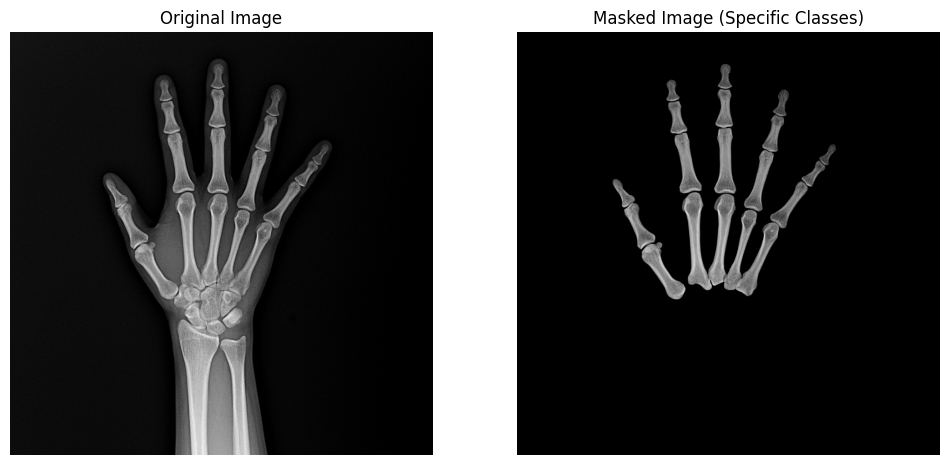

In [68]:
# Example usage
image_path = "/data/ephemeral/home/data/train/DCM/ID001/image1661130828152_R.png"
label_path = "/data/ephemeral/home/data/train/outputs_json/ID001/image1661130828152_R.json"
visualize_specific_classes(image_path, label_path)